In [41]:
import pandas as pd
import numpy as np
import sklearn
import os
import seaborn as sns

In [42]:
leases = pd.read_csv('datafest-data-read-only/Leases.csv')
print(leases.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194685 entries, 0 to 194684
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   year                            194685 non-null  int64  
 1   quarter                         194685 non-null  object 
 2   monthsigned                     193822 non-null  float64
 3   market                          194685 non-null  object 
 4   building_name                   157999 non-null  object 
 5   building_id                     194685 non-null  object 
 6   address                         194685 non-null  object 
 7   region                          194685 non-null  object 
 8   city                            194685 non-null  object 
 9   state                           194685 non-null  object 
 10  zip                             194684 non-null  float64
 11  internal_submarket              194685 non-null  object 
 12  internal_class  

In [43]:
priceANDavailability = pd.read_csv('datafest-data-read-only/Price_and_Availability_Data.csv')
print(priceANDavailability.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            1680 non-null   int64  
 1   quarter                         1680 non-null   object 
 2   market                          1680 non-null   object 
 3   internal_class                  1680 non-null   object 
 4   RBA                             1680 non-null   int64  
 5   available_space                 1680 non-null   int64  
 6   availability_proportion         1680 non-null   float64
 7   internal_class_rent             1680 non-null   float64
 8   overall_rent                    1680 non-null   float64
 9   direct_available_space          1380 non-null   float64
 10  direct_availability_proportion  1380 non-null   float64
 11  direct_internal_class_rent      1380 non-null   float64
 12  direct_overall_rent             13

In [44]:
majorMarket = pd.read_csv('datafest-data-read-only/Major_Market_Occupancy_Data-revised.csv')
print(majorMarket.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           190 non-null    int64  
 1   quarter                        190 non-null    object 
 2   market                         190 non-null    object 
 3   ending_occupancy_proportion    190 non-null    float64
 4   starting_occupancy_proportion  190 non-null    float64
 5   avg_occupancy_proportion       190 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.0+ KB
None


In [45]:
unemployment = pd.read_csv('datafest-data-read-only/Unemployment.csv')
print(unemployment.describe())
print(unemployment.info())

              year        month  unemployment_rate
count  1848.000000  1848.000000        1848.000000
mean   2021.000000     6.500000           4.515368
std       2.000541     3.452987           2.214930
min    2018.000000     1.000000           1.800000
25%    2019.000000     3.750000           3.300000
50%    2021.000000     6.500000           4.000000
75%    2023.000000     9.250000           4.800000
max    2024.000000    12.000000          22.600000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1848 non-null   int64  
 1   quarter            1848 non-null   object 
 2   month              1848 non-null   int64  
 3   state              1848 non-null   object 
 4   unemployment_rate  1848 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 72.3+ KB
None


In [46]:
main_without_majorMarketInfo2018 = pd.merge(leases, priceANDavailability, on=['year', 'quarter', 'market'], how='inner')

main_with_majorMarketInfo2020 = pd.merge(main_without_majorMarketInfo2018, majorMarket, on=['year', 'quarter', 'market'], how='inner')
#Sample size significantly decrease as majorMarket dataset only contains data after 2020, we lost three years of data.

print("Main without major markets Dataset Infomation")
print(main_without_majorMarketInfo2018.info())
print("")
print("")
print("Main with major markets Dataset Infomation")
print(main_with_majorMarketInfo2020.info())

Main without major markets Dataset Infomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291088 entries, 0 to 291087
Data columns (total 50 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   year                              291088 non-null  int64  
 1   quarter                           291088 non-null  object 
 2   monthsigned                       289722 non-null  float64
 3   market                            291088 non-null  object 
 4   building_name                     237882 non-null  object 
 5   building_id                       291088 non-null  object 
 6   address                           291088 non-null  object 
 7   region                            291088 non-null  object 
 8   city                              291088 non-null  object 
 9   state                             291088 non-null  object 
 10  zip                               291086 non-null  float64
 11  intern

In [47]:
columns_to_drop = [
    "building_name", "building_id", "address", "zip", 
    "direct_available_space", "direct_availability_proportion", 
    "direct_internal_class_rent", "direct_overall_rent", 
    "sublet_available_space", "sublet_availability_proportion", 
    "sublet_internal_class_rent", "sublet_overall_rent", "company_name", "internal_market_cluster"
    
]

# Keep only columns that are present
existing_cols = [col for col in columns_to_drop if col in main_without_majorMarketInfo2018.columns]

# Drop safely
main_without_majorMarketInfo2018_drop = main_without_majorMarketInfo2018.drop(existing_cols, axis=1)
main_without_majorMarketInfo2018_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291088 entries, 0 to 291087
Data columns (total 44 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   year                              291088 non-null  int64  
 1   quarter                           291088 non-null  object 
 2   monthsigned                       289722 non-null  float64
 3   market                            291088 non-null  object 
 4   region                            291088 non-null  object 
 5   city                              291088 non-null  object 
 6   state                             291088 non-null  object 
 7   internal_submarket                291088 non-null  object 
 8   internal_class_x                  291082 non-null  object 
 9   leasedSF                          291088 non-null  float64
 10  internal_industry                 41176 non-null   object 
 11  transaction_type                  290340 non-null  o

In [48]:
main_without_majorMarketInfo2018_drop.drop(columns = "internal_industry").dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 232956 entries, 11282 to 291083
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   year                              232956 non-null  int64  
 1   quarter                           232956 non-null  object 
 2   monthsigned                       232956 non-null  float64
 3   market                            232956 non-null  object 
 4   region                            232956 non-null  object 
 5   city                              232956 non-null  object 
 6   state                             232956 non-null  object 
 7   internal_submarket                232956 non-null  object 
 8   internal_class_x                  232956 non-null  object 
 9   leasedSF                          232956 non-null  float64
 10  transaction_type                  232956 non-null  object 
 11  costarID                          232956 non-null  in

In [49]:
x = 'internal_class_x'
y = 'internal_class_y'
diff_count = (main_without_majorMarketInfo2018_drop[x] != main_without_majorMarketInfo2018_drop[y]).sum()
print(f"Number of differing values of {x}: {diff_count}")


Number of differing values of internal_class_x: 145547


In [50]:
cols_to_drop = [col for col in main_without_majorMarketInfo2018_drop.columns if col.endswith('_y')]
main_without_majorMarketInfo2018_drop.drop(columns=cols_to_drop, inplace=True)
main_without_majorMarketInfo2018_drop.rename(
    columns={col: col[:-2] for col in main_without_majorMarketInfo2018.columns if col.endswith('_x')},
    inplace=True
)
main_without_majorMarketInfo2018_drop = main_without_majorMarketInfo2018_drop[main_without_majorMarketInfo2018_drop['leasedSF'] >= 10000]
main_without_majorMarketInfo2018_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44214 entries, 0 to 291087
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            44214 non-null  int64  
 1   quarter                         44214 non-null  object 
 2   monthsigned                     43142 non-null  float64
 3   market                          44214 non-null  object 
 4   region                          44214 non-null  object 
 5   city                            44214 non-null  object 
 6   state                           44214 non-null  object 
 7   internal_submarket              44214 non-null  object 
 8   internal_class                  44214 non-null  object 
 9   leasedSF                        44214 non-null  float64
 10  internal_industry               25790 non-null  object 
 11  transaction_type                43812 non-null  object 
 12  costarID                        4421

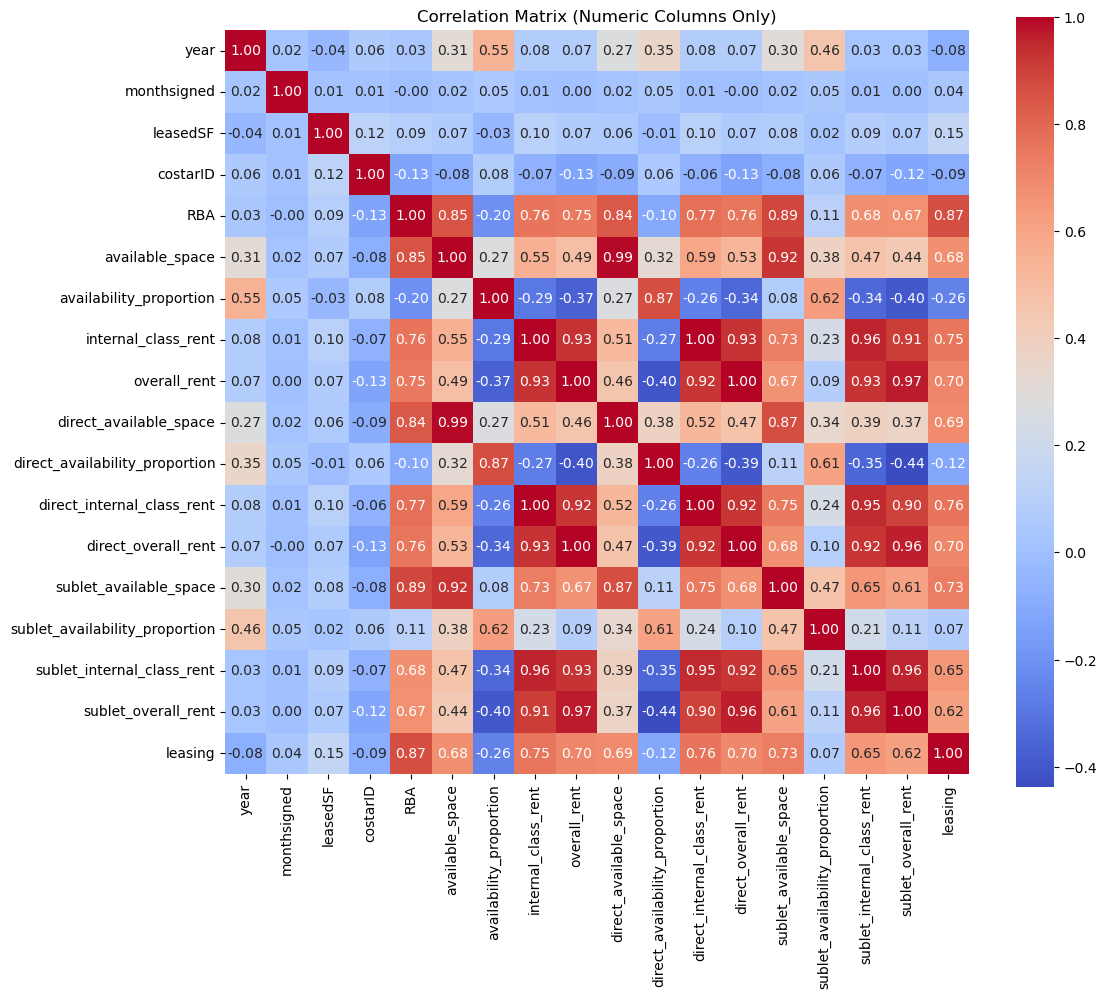

In [51]:
numeric_df = main_without_majorMarketInfo2018_drop.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Optional: display or visualize it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()


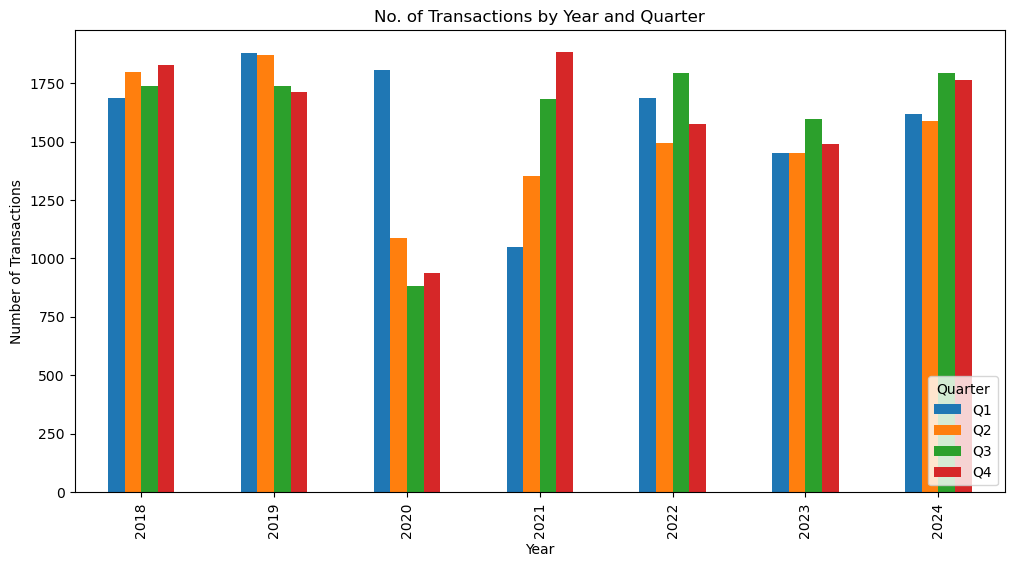

In [52]:
grouped_counts = main_without_majorMarketInfo2018_drop.groupby(['year', 'quarter']).size()

# 2. Unstack so that quarters become columns and years remain the index
grouped_counts = grouped_counts.unstack('quarter')  
# Now, grouped_counts has years on the rows and quarters on the columns

# 3. Create a bar plot with years on the x-axis and quarters in different colors
ax = grouped_counts.plot(kind='bar', figsize=(12, 6))
# 4. Label the axes and add a title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Transactions')
ax.set_title('No. of Transactions by Year and Quarter')

# 5. Show the legend and plot
plt.legend(title='Quarter', loc = 'lower right')
plt.show()

/tmp/ipykernel_4336/3878256604.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


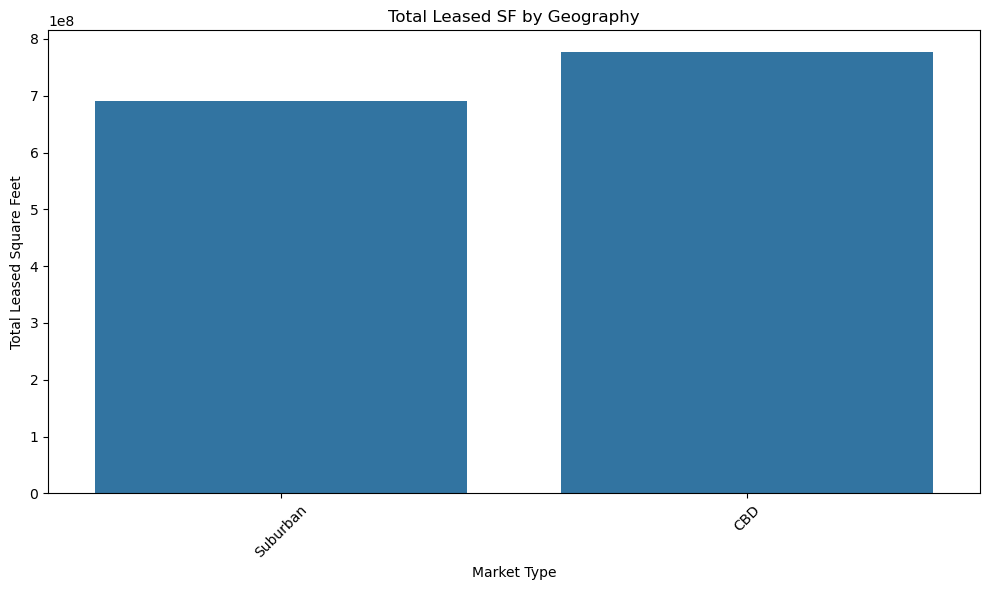

In [53]:

plt.figure(figsize=(10, 6))
sns.barplot(
    data=main_without_majorMarketInfo2018_drop,
    x='CBD_suburban',
    y='leasedSF',
    estimator=sum,
    ci=None
)
plt.title("Total Leased SF by Geography")
plt.ylabel("Total Leased Square Feet")
plt.xlabel("Market Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


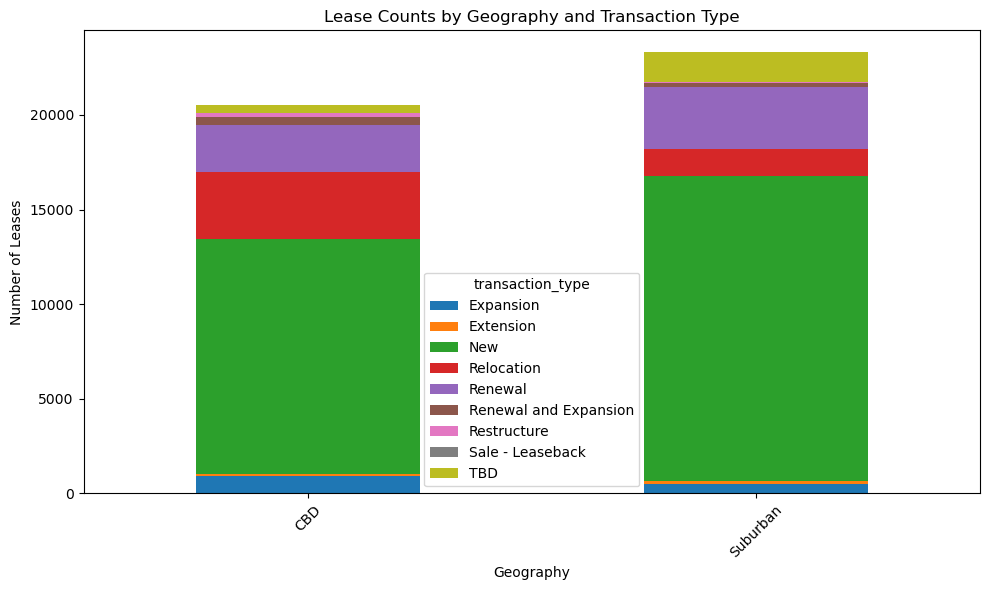

In [54]:
geo_txn = main_without_majorMarketInfo2018_drop.groupby(['CBD_suburban', 'transaction_type']).size().unstack(fill_value=0)

geo_txn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Lease Counts by Geography and Transaction Type")
plt.xlabel("Geography")
plt.ylabel("Number of Leases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


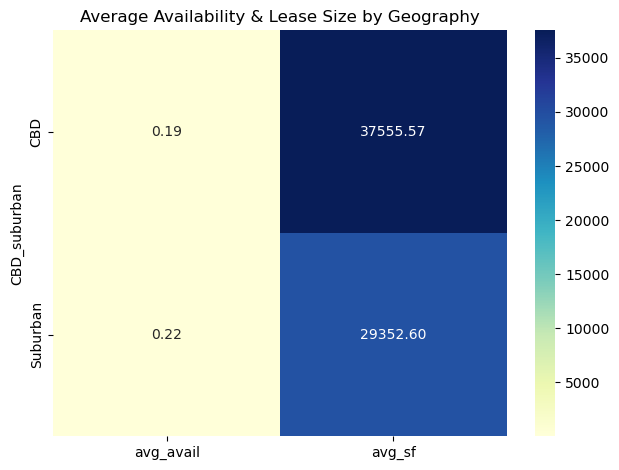

In [55]:
geo_avail = main_without_majorMarketInfo2018_drop.groupby('CBD_suburban').agg(
    avg_avail=('availability_proportion', 'mean'),
    avg_sf=('leasedSF', 'mean')
)

sns.heatmap(geo_avail, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Availability & Lease Size by Geography")
plt.tight_layout()
plt.show()


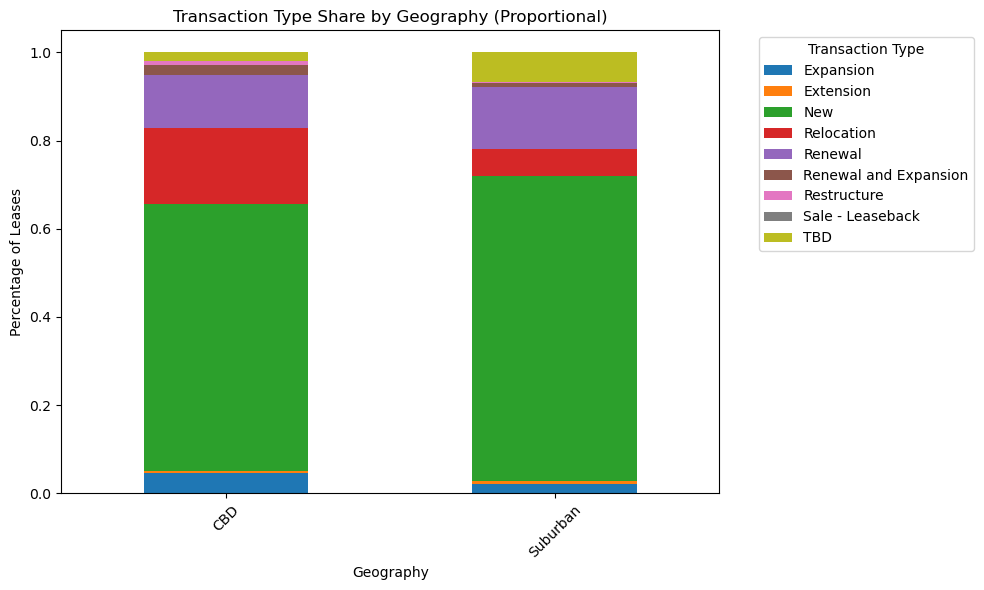

In [56]:
geo_txn_percent = geo_txn.div(geo_txn.sum(axis=1), axis=0)

geo_txn_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Transaction Type Share by Geography (Proportional)")
plt.ylabel("Percentage of Leases")
plt.xlabel("Geography")
plt.xticks(rotation=45)
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [57]:
main_with_majorMarketInfo2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75562 entries, 0 to 75561
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              75562 non-null  int64  
 1   quarter                           75562 non-null  object 
 2   monthsigned                       75334 non-null  float64
 3   market                            75562 non-null  object 
 4   building_name                     60794 non-null  object 
 5   building_id                       75562 non-null  object 
 6   address                           75562 non-null  object 
 7   region                            75562 non-null  object 
 8   city                              75562 non-null  object 
 9   state                             75562 non-null  object 
 10  zip                               75562 non-null  float64
 11  internal_submarket                75562 non-null  object 
 12  inte

In [58]:
columns_to_drop = [
    "building_name", "building_id", "address", "zip", 
    "direct_available_space", "direct_availability_proportion", 
    "direct_internal_class_rent", "direct_overall_rent", 
    "sublet_available_space", "sublet_availability_proportion", 
    "sublet_internal_class_rent", "sublet_overall_rent", "company_name", "internal_market_cluster", "costarID"
    
]

# Keep only columns that are present
existing_cols = [col for col in columns_to_drop if col in main_with_majorMarketInfo2020.columns]

# Drop safely
main_with_majorMarketInfo2020_drop = main_without_majorMarketInfo2018.drop(existing_cols, axis=1)

# main_with_majorMarketInfo2020_drop.info()

In [59]:
cols_to_drop = [col for col in main_with_majorMarketInfo2020_drop.columns if col.endswith('_y')]
main_with_majorMarketInfo2020_drop.drop(columns=cols_to_drop, inplace=True)
main_with_majorMarketInfo2020_drop.rename(
    columns={col: col[:-2] for col in main_with_majorMarketInfo2020_drop.columns if col.endswith('_x')},
    inplace=True
)
main_with_majorMarketInfo2020_drop = main_with_majorMarketInfo2020_drop[main_with_majorMarketInfo2020_drop['leasedSF'] >= 10000]

In [60]:
main_with_majorMarketInfo2020_drop = main_with_majorMarketInfo2020_drop.dropna()
main_with_majorMarketInfo2020_drop['state'] = main_with_majorMarketInfo2020_drop['state'].str.strip()

main_2020_ca = main_with_majorMarketInfo2020_drop[main_with_majorMarketInfo2020_drop['state'] == 'CA']
main_2020_tx = main_with_majorMarketInfo2020_drop[main_with_majorMarketInfo2020_drop['state'] == 'TX']
main_2020_ny = main_with_majorMarketInfo2020_drop[main_with_majorMarketInfo2020_drop['state'] == 'NY']

main_2020_ot = main_with_majorMarketInfo2020_drop[
    ~main_with_majorMarketInfo2020_drop['state'].isin(['CA', 'TX', 'NY'])
]


In [61]:
main_with_majorMarketInfo2020_drop.to_csv('main_2020_all.csv', index=False)


In [62]:

def compare_transaction_type_to_all_states(df, state_col, trans_col, target_state):
    """
    Compare transaction type percentages for a target state vs the average of all other states.

    Parameters:
    - df: pandas DataFrame
    - state_col: column with state names (e.g. 'state')
    - trans_col: column with transaction types (e.g. 'transaction_type')
    - target_state: the state to compare (e.g. 'NY')

    Returns:
    - contingency: full contingency table (counts)
    - row_percent: percentage share of each transaction type within each state
    - diff: target state's % minus national average (excluding the target)
    """

    # Drop missing state or transaction values
    df_clean = df.dropna(subset=[state_col, trans_col])

    # Create the contingency table
    contingency = pd.crosstab(df_clean[state_col], df_clean[trans_col])

    # Compute row-wise percentages
    row_percent = contingency.div(contingency.sum(axis=1), axis=0) * 100

    # Separate target and other states
    target_pct = row_percent.loc[target_state]
    other_states = row_percent.drop(index=target_state)
    other_avg = other_states.mean()

    # Calculate difference and sort
    diff = (target_pct - other_avg).sort_values(ascending=False)

    # Plot the difference
    plt.figure(figsize=(10, 5))
    diff.plot(kind='bar', color='seagreen')
    plt.title(f"Transaction Type Difference: {target_state} vs All Other States (Average)")
    plt.ylabel("Percentage Point Difference")
    plt.axhline(0, color='black', linestyle='--')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return contingency, row_percent, diff


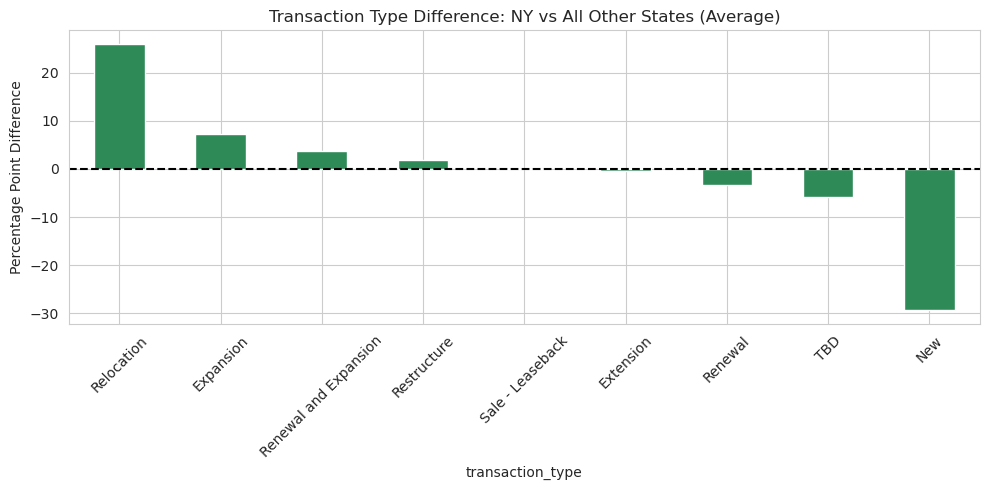

In [250]:
contingency, row_percent, diff = compare_transaction_type_to_all_states(
    df=main_with_majorMarketInfo2020_drop,
    state_col='state',
    trans_col='transaction_type',
    target_state='NY'
)


In [64]:
cy_exp = row_percent

In [65]:
def highlight_row_percent_table(row_percent_df):
    return row_percent_df.style.background_gradient(axis=1, cmap="YlGnBu").format("{:.1f}%")
styled_row_percent = highlight_row_percent_table(row_percent)
styled_row_percent


transaction_type,Expansion,Extension,New,Relocation,Renewal,Renewal and Expansion,Restructure,Sale - Leaseback,TBD
state,,,,,,,,,
AZ,3.1%,0.0%,68.0%,8.5%,9.3%,0.3%,0.0%,0.0%,10.8%
CA,4.0%,1.9%,46.6%,20.3%,23.4%,3.1%,0.2%,0.2%,0.2%
DE,0.0%,0.0%,25.0%,50.0%,25.0%,0.0%,0.0%,0.0%,0.0%
FL,0.6%,0.0%,68.0%,7.5%,21.5%,2.5%,0.0%,0.0%,0.0%
GA,3.0%,0.6%,59.6%,16.8%,18.1%,1.5%,0.2%,0.0%,0.0%
IL,2.9%,0.5%,27.1%,14.0%,17.7%,1.2%,0.5%,0.5%,35.6%
MA,5.7%,2.2%,53.4%,15.8%,20.7%,2.2%,0.0%,0.0%,0.0%
MD,1.7%,0.9%,63.4%,2.6%,29.8%,0.9%,0.9%,0.0%,0.0%
MI,1.2%,0.8%,29.0%,14.3%,22.4%,0.8%,0.0%,0.0%,31.4%


In [66]:
def transaction_type_by_area(df, area_col, trans_col):
    # Drop missing values
    df_clean = df.dropna(subset=[area_col, trans_col])

    # Create counts and percentages
    contingency = pd.crosstab(df_clean[area_col], df_clean[trans_col])
    row_percent = contingency.div(contingency.sum(axis=1), axis=0) * 100

    return contingency, row_percent
contingency_area, row_percent_area = transaction_type_by_area(
    df=main_with_majorMarketInfo2020_drop,
    area_col='CBD_suburban',
    trans_col='transaction_type'
)
def highlight_by_area_table(row_percent_df):
    return row_percent_df.style.background_gradient(axis=1, cmap="YlOrBr").format("{:.1f}%")
highlight_by_area_table(row_percent_area)


transaction_type,Expansion,Extension,New,Relocation,Renewal,Renewal and Expansion,Restructure,Sale - Leaseback,TBD
CBD_suburban,,,,,,,,,
CBD,7.1%,0.6%,37.6%,29.2%,18.8%,3.9%,1.4%,0.1%,1.3%
Suburban,3.9%,1.3%,51.3%,10.7%,23.7%,1.6%,0.3%,0.1%,7.1%


In [67]:
us_cities = pd.read_csv("uscities.csv")

main_2020_cy = main_with_majorMarketInfo2020_drop
main_2020_cy = main_with_majorMarketInfo2020_drop.merge(
    us_cities[['city', 'state_id', 'county_name']],   # pick the columns you need
    left_on=['city', 'state'],                        # columns in main_2020
    right_on=['city', 'state_id'],                    # columns in us_cities
    how='left'
)

# Optionally, rename 'county_name' to just 'county'
main_2020_cy.rename(columns={'county_name': 'county'}, inplace=True)

# Check results
print(main_2020_cy[['city', 'state', 'county']].drop_duplicates().head(10))
main_2020_cy = main_2020_cy[main_2020_cy['county'].isin(main_2020_cy['county'].value_counts()[lambda x: x >= 3].index)]
#main_2020_cy.info()


             city state     county
0        Norcross    GA   Gwinnett
2          Duluth    GA   Gwinnett
4         Atlanta    GA     Fulton
8   Sandy Springs    GA     Fulton
16         Austin    TX     Travis
22   Windsor Mill    MD        NaN
24      Cambridge    MA  Middlesex
26     Burlington    MA        NaN
28         Canton    MA        NaN
30         Boston    MA    Suffolk


In [187]:
# --- Step 1: Remove rows with 'TBD' transaction type, if applicable ---
df_area = main_2020_cy[main_2020_cy["transaction_type"] != "TBD"].copy()

# --- Step 2: Group by county and transaction type, summing the leased area (leasedSF) ---
county_area = df_area.groupby(["county", "transaction_type"])["leasedSF"].sum().unstack(fill_value=0)

# --- Step 3: Compute the total leased area per county ---
county_area["total_area"] = county_area.sum(axis=1)

# --- Step 4: Compute the percentage of area leased for each transaction type ---
county_area_pct = county_area.div(county_area["total_area"], axis=0) * 100

# --- Step 5: Define groups of transaction types ---
# Define transaction types indicative of expansion (growth)
expansion_types = ["New", "Expansion", "Renewal and Expansion"]
# Define transaction types indicative of contraction
contraction_types = ["Relocation", "Contract"]

# --- Step 6: Compute expansion and contraction percentages per county ---
county_area_pct["expansion_pct"] = county_area_pct[expansion_types].sum(axis=1)

# Only sum contraction types that exist in the DataFrame
existing_contraction_types = [t for t in contraction_types if t in county_area_pct.columns]
county_area_pct["contraction_pct"] = county_area_pct[existing_contraction_types].sum(axis=1)

# --- Step 7: Compute an area-based score ---
county_area_pct["area_score"] = county_area_pct["expansion_pct"] - county_area_pct["contraction_pct"]

# --- Step 8: Classify counties based on the area_score ---
threshold = 10  # Adjust threshold as needed

def classify_area(score):
    if score > threshold:
        return "Expansion"
    elif score < -threshold:
        return "Contract"
    else:
        return "Remain Same"

county_area_pct["classification"] = county_area_pct["area_score"].apply(classify_area)

# --- Step 9: Display results and export ---
result = county_area_pct[["expansion_pct", "contraction_pct", "area_score", "classification"]]
print(result.sort_values("area_score", ascending=False).head())
result.to_csv("county_area_classification.csv")


transaction_type  expansion_pct  contraction_pct  area_score classification
county                                                                     
Will                 100.000000         0.000000  100.000000      Expansion
Burlington           100.000000         0.000000  100.000000      Expansion
Monmouth              84.937017         0.000000   84.937017      Expansion
King                  82.646150         2.426633   80.219517      Expansion
Mecklenburg           84.845331         5.176756   79.668575      Expansion


In [69]:
def sns_compare_market_to_us(df, market_col, trans_col, target_market):
    """
    Create a Seaborn barplot comparing a target market's transaction type percentages
    to the US average (excluding the target market) for each transaction type, with "TBD"
    removed from the data.
    
    Parameters:
    - df: pandas DataFrame containing market and transaction type data.
    - market_col: name of the column containing market names (e.g., 'market')
    - trans_col: name of the column containing transaction types (e.g., 'transaction_type')
    - target_market: the market to compare (e.g., 'New York')
    
    Returns:
    - diff: A pandas Series of the percentage differences (target market - US average)
    """
    # Remove rows with TBD transaction type and drop rows with missing values.
    df_clean = df[(df[trans_col] != "TBD")].dropna(subset=[market_col, trans_col])
    
    # Create a contingency table of counts (markets x transaction types).
    contingency = pd.crosstab(df_clean[market_col], df_clean[trans_col])
    
    # Compute row-wise percentages so that each market's percentages sum to 100.
    row_percent = contingency.div(contingency.sum(axis=1), axis=0) * 100
    
    # Extract the percentages for the target market.
    target_pct = row_percent.loc[target_market]
    
    # Compute the US average (excluding the target market).
    other_avg = row_percent.drop(index=target_market).mean()
    
    # Compute the difference (target market - US average) and sort.
    diff = (target_pct - other_avg).sort_values(ascending=False)
    
    # Plot using Seaborn.
    plt.figure(figsize=(10, 6))
    sns.barplot(x=diff.index, y=diff.values, color='seagreen')
    plt.title(f"Transaction Type Difference: {target_market} vs. US Average")
    plt.ylabel("Percentage Point Difference")
    plt.axhline(0, color='black', linestyle='--')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return diff

# Example usage:
# Assuming your DataFrame is named 'cy_exp' and contains columns 'market' and 'transaction_type'
# Here we call the function for the target market "New York"


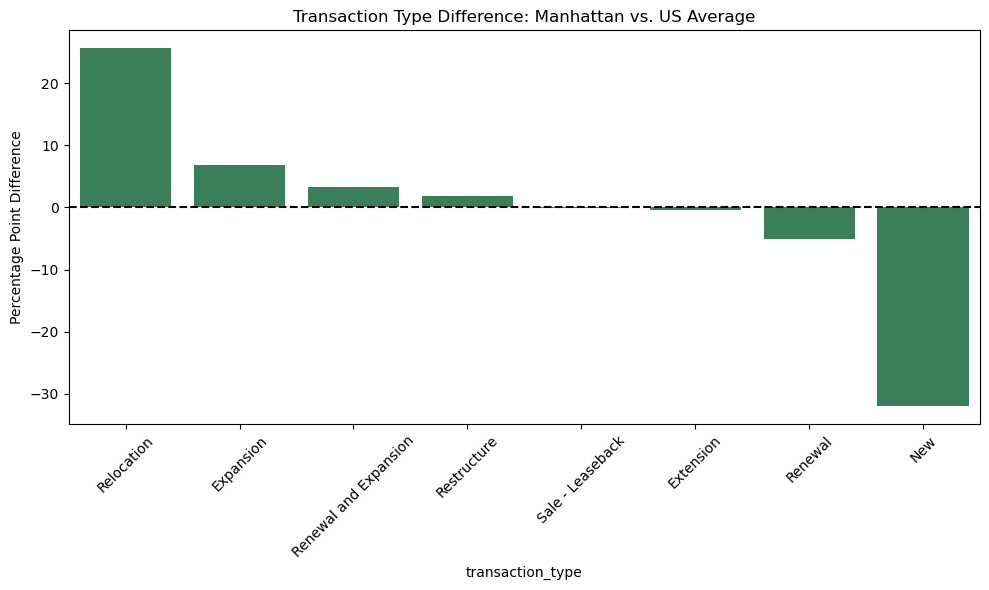

In [ ]:
diff_series = sns_compare_market_to_us(main_2020_cy, market_col='market', trans_col='transaction_type', target_market='Manhattan')


In [126]:
geom = pd.read_csv("geocoded_with_county.csv")
geom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            26401 non-null  int64  
 1   quarter                         26401 non-null  object 
 2   monthsigned                     25635 non-null  float64
 3   market                          26401 non-null  object 
 4   building_name                   21858 non-null  object 
 5   building_id                     26401 non-null  object 
 6   address                         26401 non-null  object 
 7   region                          26401 non-null  object 
 8   city                            26401 non-null  object 
 9   state                           26401 non-null  object 
 10  zip                             26401 non-null  float64
 11  internal_submarket              26401 non-null  object 
 12  internal_class                  

In [124]:
import folium
import random
import requests
import pandas as pd
from io import StringIO
import geopandas as gpd
from shapely.geometry import Point
from branca.colormap import linear

# 🌍 Create a minimal base map
m = folium.Map(location=[39.5, -98.35], zoom_start=4, tiles='CartoDB Positron')

# ✅ Add US state boundaries
states_url = 'https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/us-states.json'
folium.GeoJson(states_url, name='US States', style_function=lambda x: {
    'fillOpacity': 0,
    'color': 'black',
    'weight': 1
}).add_to(m)

# 📥 Load county FIPS-to-name mapping
fips_url = "https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_and_county_fips_master.csv"
fips_data = requests.get(fips_url).text
fips_df = pd.read_csv(StringIO(fips_data))

fips_to_name = {
    f"{row['fips']}".zfill(5): f"{row['name']}, {row['state']}"
    for _, row in fips_df.iterrows()
}

# 🧩 Load and modify counties GeoJSON
counties_url = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
counties_data = requests.get(counties_url).json()



In [185]:
# List to store per-year DataFrames with combined criteria
county_scores_by_year = {}

# Transaction types used to classify trends
expansion_types = ["New", "Expansion", "Renewal and Expansion"]
contraction_types = ["Relocation", "Contract"]

# Loop through each year
for year in range(2019, 2025):
    # Filter the data for the given year and valid transaction types
    df_year = geom[(geom["year"] == year) & 
                           (geom["transaction_type"] != "TBD")].copy()
    
    if df_year.empty:
        continue

    # Group by county, space type, and transaction type, summing leased area
    grouped = df_year.groupby(["county", "space_type", "transaction_type"])["leasedSF"].sum().reset_index()
    
    # Pivot the data to have transaction types as columns per county and space type
    pivot = grouped.pivot_table(index=["county", "space_type"], 
                                columns="transaction_type", 
                                values="leasedSF", 
                                fill_value=0)
    
    # Compute total leased area per county and space type
    pivot["total_area"] = pivot.sum(axis=1)
    
    # Convert values to percentages of the total area for that space type
    pivot_pct = pivot.div(pivot["total_area"], axis=0) * 100
    
    # Calculate expansion and contraction percentages per space type
    pivot_pct["expansion_pct"] = pivot_pct[expansion_types].sum(axis=1)
    contraction_actual = [t for t in contraction_types if t in pivot_pct.columns]
    pivot_pct["contraction_pct"] = pivot_pct[contraction_actual].sum(axis=1)
    
    # Compute net area score for each county and space type
    pivot_pct["area_score"] = pivot_pct["expansion_pct"] - pivot_pct["contraction_pct"]
    
    # Aggregate across space types to get a county-level score.
    # Here we take a simple average of area scores across different space types.
    county_agg = pivot_pct.groupby("county")["area_score"].mean().reset_index()

    # Classification function based on overall county area score
    def classify(score):
        if score > 10:
            return "Expansion"
        elif score < -10:
            return "Contract"
        else:
            return "Remain Same"
    
    county_agg["classification"] = county_agg["area_score"].apply(classify)

    # Save the county-level results for the year
    county_scores_by_year[year] = county_agg

# county_scores_by_year now contains a DataFrame for each year with county, area_score, and classification.


In [186]:
county_scores_by_year[2019]
county_scores_by_year[2020]
county_scores_by_year[2021]
county_scores_by_year[2022]
county_scores_by_year[2023]
county_scores_by_year[2024]
for year, df in county_scores_by_year.items():
    filename = f"county_scores_{year}.csv"
    df.to_csv(filename, index=False)
    print(f"Exported {year} to {filename}")

Exported 2019 to county_scores_2019.csv
Exported 2020 to county_scores_2020.csv
Exported 2021 to county_scores_2021.csv
Exported 2022 to county_scores_2022.csv
Exported 2023 to county_scores_2023.csv
Exported 2024 to county_scores_2024.csv


In [183]:
import pandas as pd

# Assuming your DataFrame 'geom' already exists and has columns:
# 'county', 'transaction_type', and 'leasing'

# Define a function to calculate the net effect for each record.
def net_effect(row):
    if row['transaction_type'] in ['new', 'expansion']:
        return row['leasing']
    elif row['transaction_type'] in ['renewal', 'relocation']:
        return row['leasing']  # Or return 0 if you wish to treat these as neutral
    else:
        return 0

# Create the net_effect column
geom['net_effect'] = geom.apply(net_effect, axis=1)

# Filter out counties with fewer than 3 records.
geom_filtered = geom.groupby('county').filter(lambda x: len(x) >= 3)

# Aggregate the net effect by county for the filtered data.
county_net = geom_filtered.groupby('county')['net_effect'].sum().reset_index()

# For demonstration, calculate a threshold using standard deviation
mean_effect = county_net['net_effect'].mean()
std_effect = county_net['net_effect'].std()
threshold = std_effect  # You could adjust this as needed

print(f"Mean net effect: {mean_effect:.2f} SF")
print(f"Standard deviation of net effect: {std_effect:.2f} SF")
print(f"Threshold for significant change: {threshold:.2f} SF")

# Define a function to classify counties based on net effect and the threshold.
def classify_net_effect(value, threshold):
    if value > threshold:
        return 'Expanding'
    elif value < -threshold:
        return 'Contracting'
    else:
        return 'Stable'

# Apply the classification
county_net['status'] = county_net['net_effect'].apply(lambda x: classify_net_effect(x, threshold))

# Display the resulting DataFrame.
print(county_net)


Mean net effect: 0.00 SF
Standard deviation of net effect: 0.00 SF
Threshold for significant change: 0.00 SF
          county  net_effect  status
0          Adams           0  Stable
1        Alameda           0  Stable
2     Alexandria           0  Stable
3   Anne Arundel           0  Stable
4       Arapahoe           0  Stable
..           ...         ...     ...
95     Washtenaw           0  Stable
96         Wayne           0  Stable
97    Williamson           0  Stable
98     Worcester           0  Stable
99          York           0  Stable

[100 rows x 3 columns]


In [156]:
geom["net_effect"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26401 entries, 0 to 26400
Series name: net_effect
Non-Null Count  Dtype
--------------  -----
26401 non-null  int64
dtypes: int64(1)
memory usage: 206.4 KB


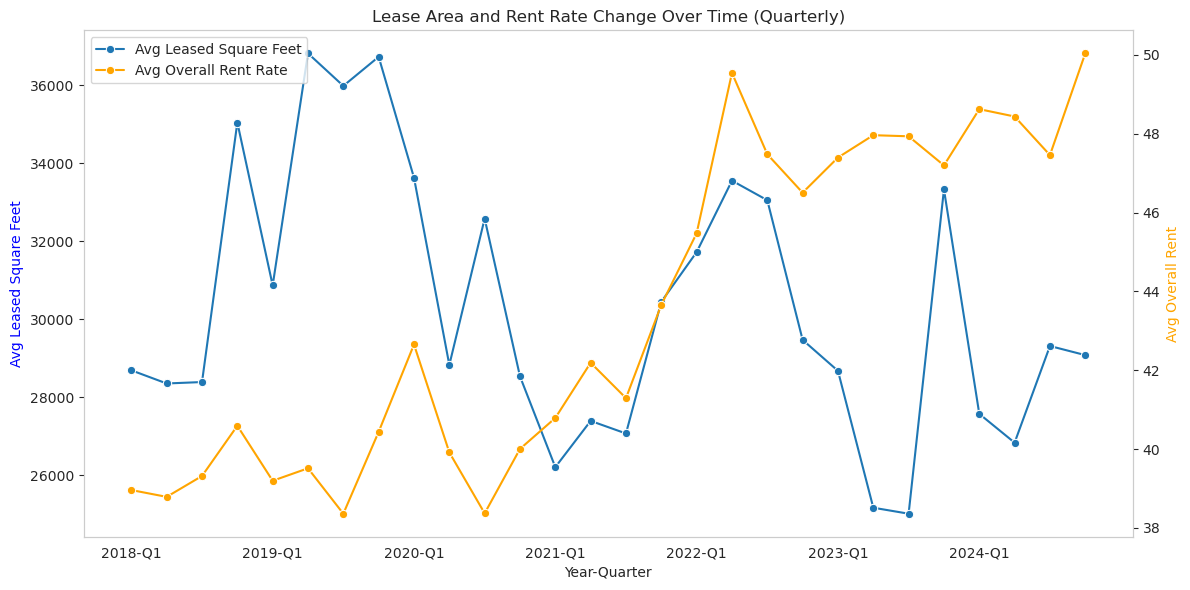

In [129]:


# Suppose your grouped DataFrame is named `grouped` and has columns:
# ['period', 'leasedSF', 'overall_rent']

# Create a figure and a main axis (ax1)
fig, ax1 = plt.subplots(figsize=(12,6))

# Create a secondary axis (ax2) that shares the same x-axis
ax2 = ax1.twinx()

# Plot leasedSF on ax1
sns.lineplot(
    data=grouped, 
    x='period', 
    y='leasedSF', 
    ax=ax1, 
    marker='o', 
    label='Avg Leased Square Feet'
)

# Plot overall_rent on ax2
sns.lineplot(
    data=grouped, 
    x='period', 
    y='overall_rent', 
    ax=ax2, 
    marker='o', 
    color='orange', 
    label='Avg Overall Rent Rate'
)

# Label axes
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('Avg Leased Square Feet', color='blue')
ax2.set_ylabel('Avg Overall Rent', color='orange')

# Set plot title and rotate x-ticks for readability
plt.title('Lease Area and Rent Rate Change Over Time (Quarterly)')
plt.xticks(rotation=45)

# Remove grid lines explicitly
ax1.grid(False)
ax2.grid(False)


if ax1.get_legend():
    ax1.get_legend().remove()

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Adjust x-ticks frequency
ax1.set_xticks(ax1.get_xticks()[::4])



plt.tight_layout()
plt.show()


In [130]:
import scipy.stats as stats

# Assuming 'grouped' is your DataFrame with the columns 'leasedSF' and 'overall_rent'
r, p_value = stats.pearsonr(grouped['leasedSF'], grouped['overall_rent'])

print("Pearson correlation coefficient: {:.3f}".format(r))
print("p-value: {:.3e}".format(p_value))


Pearson correlation coefficient: -0.269
p-value: 1.657e-01


In [138]:
geom["internal_industry"].unique()

array(['Financial Services and Insurance',
       'Construction, Engineering and Architecture',
       'Technology, Advertising, Media, and Information',
       'Manufacturing (except Pharmaceutical, Retail, and Computer Tech)',
       'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)',
       'Transportation', 'Coworking and Executive Suite Companies',
       'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting',
       'Education', 'Legal Services',
       'Real Estate (except coworking providers)', 'Healthcare',
       'Personal Services and Recreation', 'Government', 'Retail',
       'Energy & Utilities', 'TBD', 'Pharmaceuticals',
       'Agriculture, Forestry, Fishing, Metal & Mineral Mining',
       'Unclassifiable'], dtype=object)

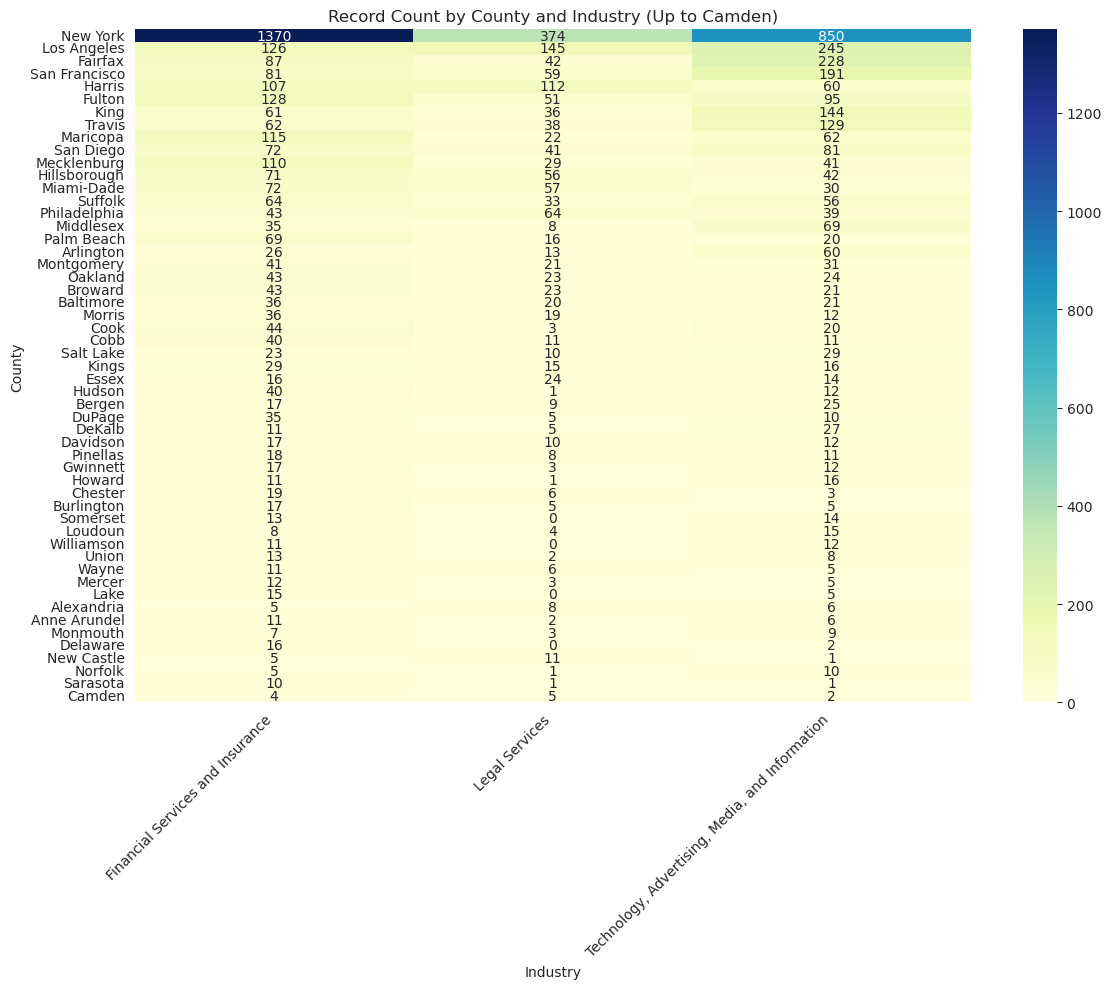

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose pivot_count is your pivot table indexed by county
# 1. Identify Camden's position or use label-based slicing
pivot_count = pivot_count.loc[:'Camden']

# 2. Plot the heatmap of the sliced DataFrame
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_count, annot=True, fmt="g", cmap="YlGnBu")
plt.title("Record Count by County and Industry (Up to Camden)")
plt.xlabel("Industry")
plt.ylabel("County")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [182]:
import pandas as pd
import plotly.express as px

# Assume pivot_count is your DataFrame structured with:
#   - index: county
#   - columns: industries
#   - values: counts

# 1. Melt (unpivot) pivot_count to get a long format:
#    Columns: ['county', 'industry', 'count']
df_long = pivot_count.reset_index().melt(
    id_vars='county',
    var_name='industry',
    value_name='count'
)

# 2. Build a custom color mapping for industries
color_discrete_map = {}
for industry in df_long['industry'].unique():
    if industry == "Legal Services":
        color_discrete_map[industry] = "#D94032"  # Red: RGB(219, 71, 51)
    elif industry == "Technology, Advertising, Media, and Information":
        color_discrete_map[industry] = "#41AEF2"  # Blue: RGB(57, 157, 230)
    elif industry == "Financial Services and Insurance":
        color_discrete_map[industry] = "#03735E"  # Green remains
    else:
        color_discrete_map[industry] = "grey"

# 3. Create a hierarchical treemap:
#    - First level: Industry
#    - Second level: County
fig = px.treemap(
    df_long,
    path=['industry', 'county'],
    values='count',
    color='industry',
    color_discrete_map=color_discrete_map,
    title='Treemap of Record Counts by Industry and County'
)
fig.write_image("treemap_highres.png", format="png", scale=5)  # scale=5 gives high DPI
fig.show()


In [166]:
import pandas as pd

# 1. Filter data for Oakland County
oakland_df = geom[geom['county'] == 'Oakland'].copy()

# 2. Group by industry and year, then count the records
industry_year_counts = oakland_df.groupby(['internal_industry', 'year']).size().reset_index(name='yearly_count')

# 3. Compute total counts for each industry across all years
total_industry_counts = oakland_df.groupby('internal_industry').size().reset_index(name='total_count')

# 4. Merge the yearly counts with the total counts
industry_year_counts = industry_year_counts.merge(total_industry_counts, on='internal_industry', how='left')

# 5. Sort by total count (descending) and then by year (ascending)
industry_year_counts = industry_year_counts.sort_values(['total_count', 'year'], ascending=[False, True])

# Display the result
print(industry_year_counts)


                          internal_industry  year  yearly_count  total_count
57                                      TBD  2018           410          649
58                                      TBD  2019           181          649
59                                      TBD  2020             1          649
60                                      TBD  2021            10          649
61                                      TBD  2022             8          649
..                                      ...   ...           ...          ...
30                               Government  2019             1            2
31                               Government  2020             1            2
17  Coworking and Executive Suite Companies  2020             1            1
49                          Pharmaceuticals  2022             1            1
56                                   Retail  2023             1            1

[75 rows x 4 columns]


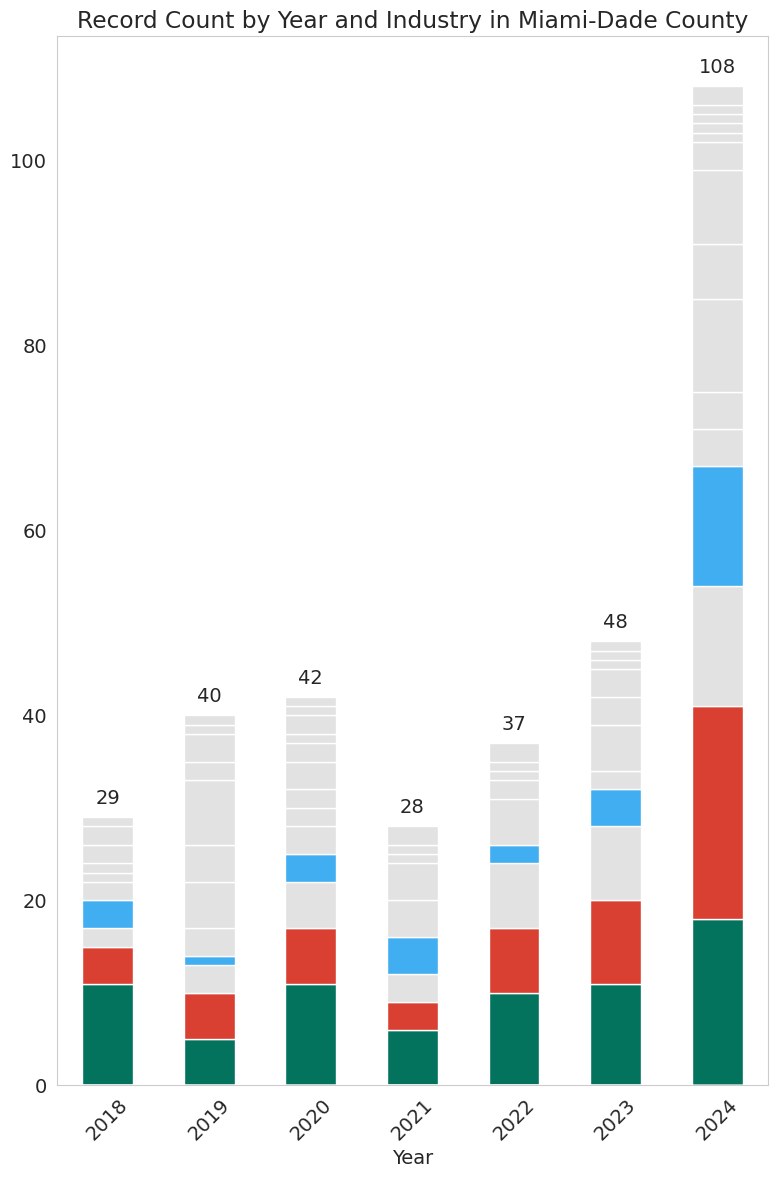

In [267]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming geom is already defined with your data

# 1. Filter for Miami-Dade County and remove records with "TBD" in internal_industry
dade_df = geom[(geom['county'] == 'Miami-Dade') & (geom['internal_industry'] != 'TBD')].copy()

# 2. Group by year and internal_industry, and count the records
counts = dade_df.groupby(['year', 'internal_industry']).size().reset_index(name='count')

# 3. Pivot the DataFrame: rows = year, columns = internal_industry, values = count
pivot_counts = counts.pivot(index='year', columns='internal_industry', values='count').fillna(0)

# 4. Sort industries by total count (descending) across all years
total_counts = pivot_counts.sum(axis=0).sort_values(ascending=False)
pivot_counts = pivot_counts[total_counts.index]

# Define custom hex colors using your RGB values:
RED_HEX = "#D94032"         # Legal Services: RGB(185, 53, 41)
BLUE_HEX = "#41AEF2"        # Technology, Advertising, Media, and Information: RGB(43, 125, 188)
GREEN_HEX = "#03735E"       # Financial Services and Insurance (example green)
GREY_HEX = "#E2E2E2"        # All other industries

# 5. Create a color map using exact industry name matching
color_map = []
for industry in pivot_counts.columns:
    if industry == "Legal Services":
        color_map.append(RED_HEX)
    elif industry == "Technology, Advertising, Media, and Information":
        color_map.append(BLUE_HEX)
    elif industry == "Financial Services and Insurance":
        color_map.append(GREEN_HEX)
    else:
        color_map.append(GREY_HEX)

# Increase the font size for all plot elements
plt.rcParams.update({'font.size': 14})

# 6. Plot a stacked bar chart with the custom color map without grid
ax = pivot_counts.plot(kind='bar', stacked=True, figsize=(8, 12), color=color_map, legend=False, grid=False)

# Make x-axis labels 45° rotated
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Annotate each bar with the total count on top
totals = pivot_counts.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 1, int(total), ha='center', va='bottom')

# Move the y-axis label to the top of the axis
ax.yaxis.set_label_coords(-0.1, 1.02)

plt.xlabel("Year")
plt.title("Record Count by Year and Industry in Miami-Dade County")
plt.tight_layout()
plt.show()


In [291]:
def sns_compare_county_to_us(df, county_col, trans_col, target_county):
    """
    Create a Seaborn barplot comparing a target market's transaction type percentages
    to the US average (excluding the target market) for each transaction type, with "TBD"
    removed from the data.
    
    Parameters:
    - df: pandas DataFrame containing market and transaction type data.
    - county_col: name of the column containing market names (e.g., 'market')
    - trans_col: name of the column containing transaction types (e.g., 'transaction_type')
    - target_county: the market to compare (e.g., 'New York')
    
    Returns:
    - diff: A pandas Series of the percentage differences (target market - US average)
    """
    # Remove rows with TBD transaction type and drop rows with missing values.
    df_clean = df[(df[trans_col] != "TBD")].dropna(subset=[county_col, trans_col])
    
    # Create a contingency table of counts (markets x transaction types).
    contingency = pd.crosstab(df_clean[county_col], df_clean[trans_col])
    
    # Compute row-wise percentages so that each market's percentages sum to 100.
    row_percent = contingency.div(contingency.sum(axis=1), axis=0) * 100
    
    # Extract the percentages for the target market.
    target_pct = row_percent.loc[target_county]
    
    # Compute the US average (excluding the target market).
    other_avg = row_percent.drop(index=target_county).mean()
    
    # Compute the difference (target market - US average) and sort.
    diff = (target_pct - other_avg).sort_values(ascending=False)
    
    # Plot using Seaborn.
    plt.figure(figsize=(15, 8))
    sns.barplot(x=diff.index, y=diff.values, color='#03735E')
    plt.title(f"Transaction Type Difference: {target_county} vs. US Average")
    plt.ylabel("Percentage Point Difference")
    plt.xlabel("Transaction Type")
    plt.axhline(0, color='black', linestyle='--')
    plt.xticks(rotation=0)
    
    # Remove grid lines.
    plt.grid(False)
    
    # Remove the numeric labels on the y-axis but keep the axis label.
    ax = plt.gca()
    ax.tick_params(labelleft=False)  # Hide the y-axis tick labels
    # If you also want to remove the ticks themselves, you can add:
    # ax.tick_params(axis='y', which='both', length=0)
    
    plt.tight_layout()
    plt.show()
    
    return diff


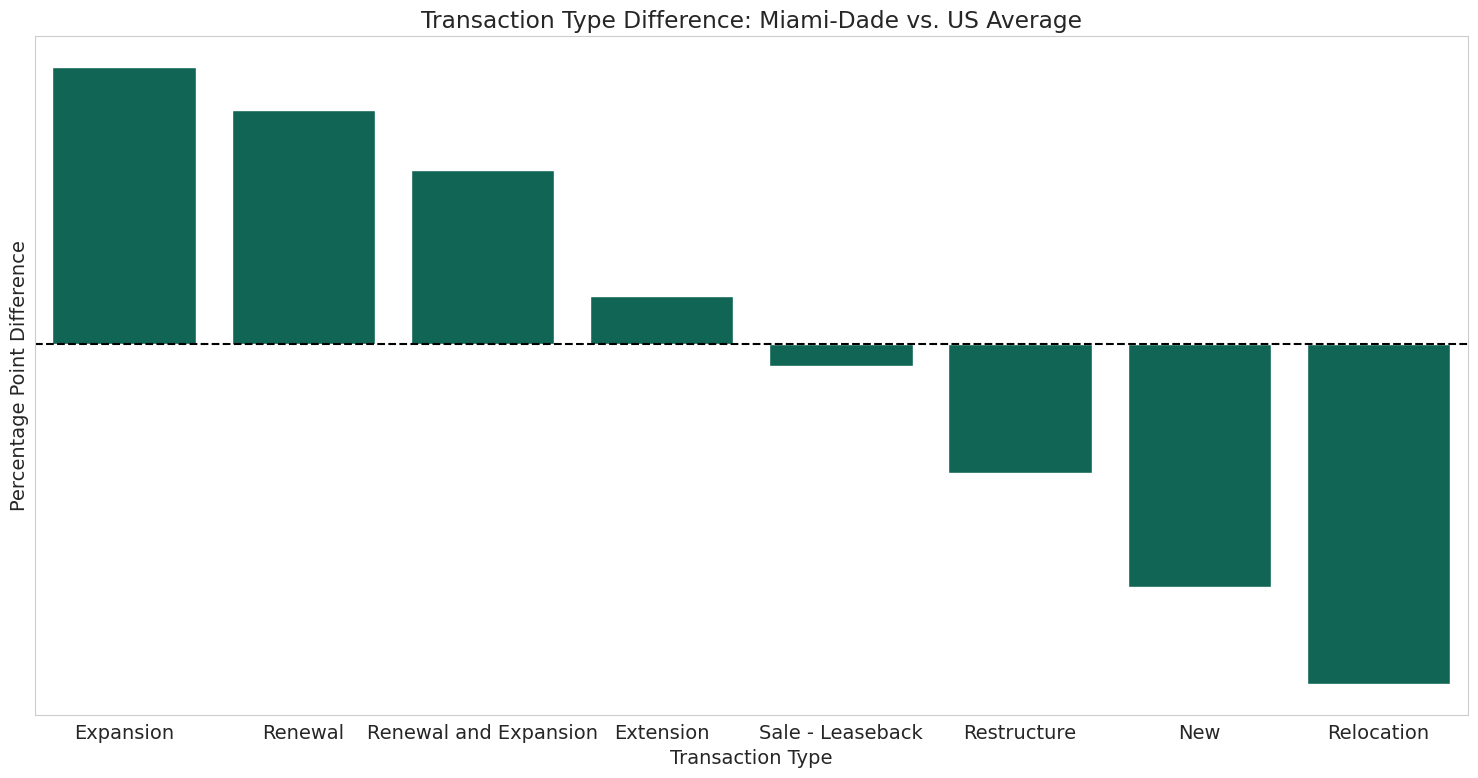

transaction_type
Expansion                1.234761
Renewal                  1.043468
Renewal and Expansion    0.774836
Extension                0.215217
Sale - Leaseback        -0.098510
Restructure             -0.574077
New                     -1.082266
Relocation              -1.513429
dtype: float64

In [292]:
sns_compare_county_to_us(geom, county_col='county', trans_col='transaction_type', target_county='Miami-Dade')


In [293]:

def compare_transaction_type_to_all_county(df, state_col, trans_col, target_state):
    """
    Compare transaction type percentages for a target state vs the average of all other states.

    Parameters:
    - df: pandas DataFrame
    - state_col: column with state names (e.g. 'state')
    - trans_col: column with transaction types (e.g. 'transaction_type')
    - target_state: the state to compare (e.g. 'NY')

    Returns:
    - contingency: full contingency table (counts)
    - row_percent: percentage share of each transaction type within each state
    - diff: target state's % minus national average (excluding the target)
    """

    # Drop missing state or transaction values
    df_clean = df.dropna(subset=[state_col, trans_col])

    # Create the contingency table
    contingency = pd.crosstab(df_clean[state_col], df_clean[trans_col])

    # Compute row-wise percentages
    row_percent = contingency.div(contingency.sum(axis=1), axis=0) * 100

    # Separate target and other states
    target_pct = row_percent.loc[target_state]
    other_states = row_percent.drop(index=target_state)
    other_avg = other_states.mean()

    # Calculate difference and sort
    diff = (target_pct - other_avg).sort_values(ascending=False)

    # Plot the difference
    plt.figure(figsize=(10, 5))
    diff.plot(kind='bar', color='seagreen')
    plt.title(f"Transaction Type Difference: {target_state} vs All Other States (Average)")
    plt.ylabel("Percentage Point Difference")
    plt.axhline(0, color='black', linestyle='--')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return contingency, row_percent, diff


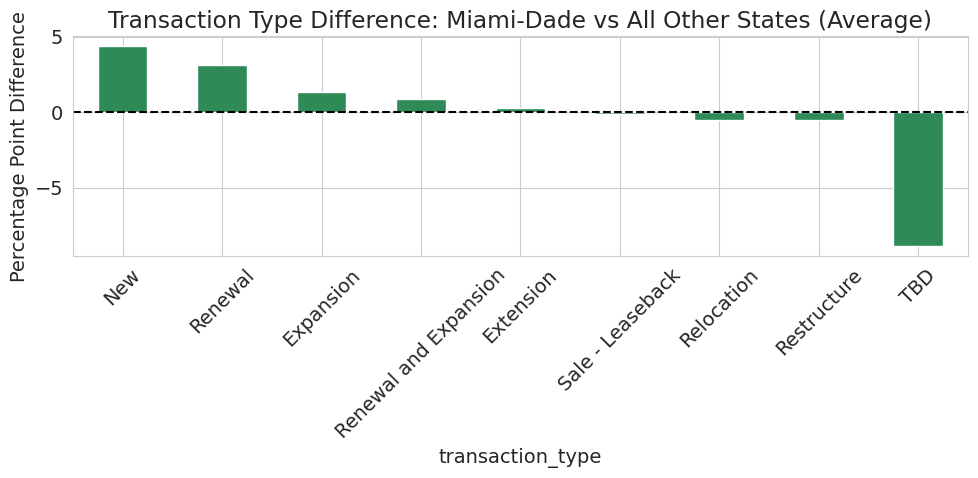

In [294]:
contingency, county_row_percent, diff = compare_transaction_type_to_all_county(geom, "county", "transaction_type", "Miami-Dade")

In [249]:
def highlight_row_percent_table(county_row_percent):
    return county_row_percent.style.background_gradient(axis=1, cmap="YlGnBu").format("{:.1f}%")
styled_row_percent = highlight_row_percent_table(county_row_percent)
styled_row_percent


transaction_type,Expansion,Extension,New,Relocation,Renewal,Renewal and Expansion,Restructure,Sale - Leaseback,TBD
county,,,,,,,,,
Adams,0.0%,0.0%,46.2%,0.0%,38.5%,0.0%,0.0%,0.0%,15.4%
Alameda,0.0%,0.0%,66.7%,0.0%,33.3%,0.0%,0.0%,0.0%,0.0%
Alexandria,1.3%,1.3%,53.8%,3.8%,39.7%,0.0%,0.0%,0.0%,0.0%
Anne Arundel,0.0%,0.0%,62.7%,1.5%,35.8%,0.0%,0.0%,0.0%,0.0%
Arapahoe,1.2%,0.6%,57.1%,3.5%,31.2%,0.6%,0.0%,0.0%,5.9%
Arlington,4.6%,3.4%,50.0%,2.3%,36.1%,3.1%,0.3%,0.0%,0.3%
Baltimore,1.4%,0.9%,60.2%,3.3%,32.2%,0.9%,0.9%,0.0%,0.0%
Bergen,5.6%,0.7%,46.5%,8.5%,35.2%,2.8%,0.0%,0.0%,0.7%
Boulder,2.9%,0.0%,60.0%,5.7%,17.1%,0.0%,0.0%,0.0%,14.3%
